In [161]:
#Assumptions for ANOVA: independence, normality**, equality/homogeneity of variance

#**tests for normality: central tendency (mean and median), skewness, kurtosis

#Q: How strong is the effect of the dosage level of the new medication on cholesterol?
##Reference: https://stattrek.com/anova/completely-randomized/one-way-example

In [163]:
import pandas as pd
import scipy.stats as stats
import numpy as np

In [165]:
data = pd.read_csv("/Users/colleenl/Documents/datasets/dosage.csv")

In [167]:
columns = data.columns

##gives length // total number of columns
len(columns)

##prints column headings
for col in range(len(columns)):
    print(columns[col])

0 mg
50 mg
100 mg


In [169]:
anova = stats.f_oneway(data["0 mg"], data["50 mg"], data["100 mg"])
print(anova)

F_onewayResult(statistic=4.16, pvalue=0.04241751817647503)


In [171]:
#step-by-step calculations

In [173]:
## average of each dosage

mean1 = np.mean(data["0 mg"])
mean2 = np.mean(data["50 mg"])
mean3 = np.mean(data["100 mg"])

print("Average for 0 mg: " + str(mean1))
print("Average for 50 mg: " + str(mean2))
print("Average for 100 mg: " + str(mean3))

##instead of len(data.columns), you can also use data.shape[1]
overallMean = (mean1 + mean2 + mean3)/(len(data.columns))
print('Overall mean: {}'.format(overallMean))

Average for 0 mg: 258.0
Average for 50 mg: 246.0
Average for 100 mg: 210.0
Overall mean: 238.0


In [192]:
#between-group sum of squared differences
diffMeanOne = mean1 - overallMean
diffMeanTwo = mean2 - overallMean
diffMeanThree = mean3 - overallMean

SSB = (data.shape[0])*(diffMeanOne**2 + diffMeanTwo**2 + diffMeanThree**2)
print("between groups sum of squared differences: " + str(SSB))

#between-groups mean square value
degreesOfFreedom = len(data.columns) - 1
MSB = SSB/degreesOfFreedom
print("between groups mean square value: " + str(MSB))

#within-group sum of squares
errorOne = list(data["0 mg"] - mean1)
errorTwo = list(data["50 mg"] - mean2)
errorThree = list(data["100 mg"] - mean3)

overallError = errorOne + errorTwo + errorThree
ssw = []
for i in overallError:
    ssw.append(i**2)

SSW = np.sum(ssw)

print("Within-group sum of squared difference: " + str(SSW))

#within-group mean square value
degreesOfFreedomOfAllData = (data.shape[0] * data.shape[1]) - data.shape[1]
MSW = SSW/degreesOfFreedomOfAllData
print("within-group mean square value: " + str(MSW))

#f-score
fScore = MSB/MSW
print("f-score: " + str(fScore))

between groups sum of squared differences: 6240.0
between groups mean square value: 3120.0
Within-group sum of squared difference: 9000.0
within-group mean square value: 750.0
f-score: 4.16


In [194]:
##for strength of the treatment effect -> must compute eta squared
##eta squared is (between-groups sum of squares / total sum of squares)

In [196]:
#total sum of squares
SST = SSB + SSW
etaSquared = SSB/SST
print("strength of effect: " + str(etaSquared))

strength of effect: 0.4094488188976378


In [200]:
#conclusion
dependentVar = "cholesterol"
independentVar = "treatment"
print("41% of the variance in" + dependentVar + " can be explained by the effect of the " + independentVar)

41% of the variance incholesterol can be explained by the effect of the treatment


In [204]:
##graphing
from scipy.stats import f 
import matplotlib.pyplot as plt

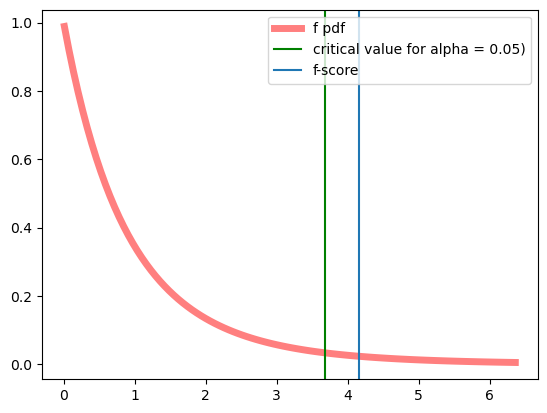

In [215]:
fig, ax = plt.subplots(1,1)
dfn, dfd = degreesOfFreedom, (data.shape[0] * data.shape[1])

#line for f
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'r-', lw = 5, alpha = 0.5, label = "f pdf")

#line for critical value
plt.axvline(x = 3.68, label = "critical value for alpha = 0.05)", color = "g")

#line for f-score
plt.axvline(x = fScore, label = "f-score")

plt.legend()

In [217]:
#conclusion2: we reject the null hypothesis because f-score > critical valye for alpha = 0.05
#There is a difference between the cholesterol level among the different doses of the treatment